In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


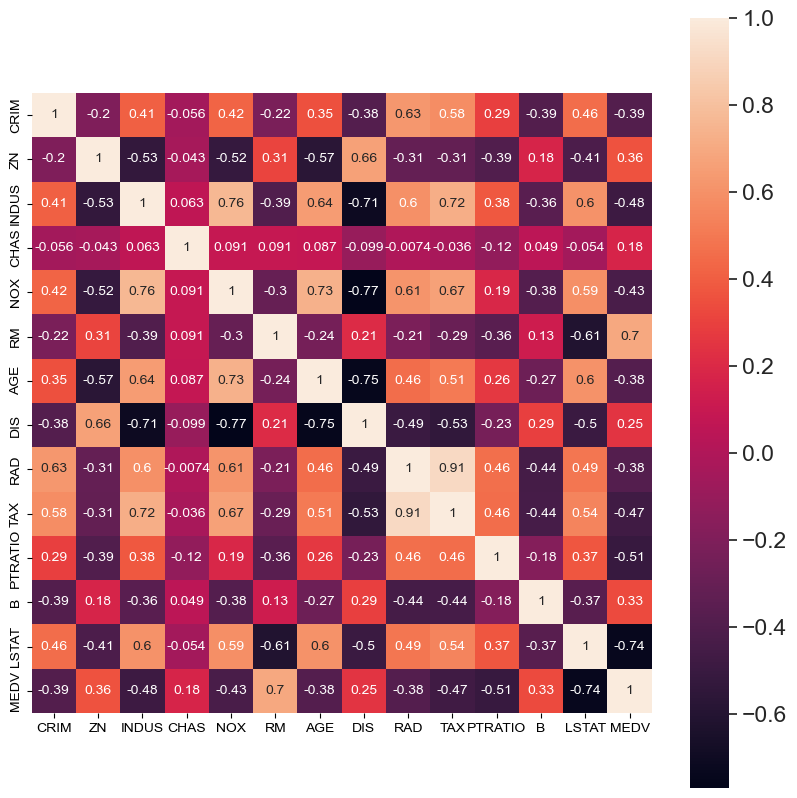

In [8]:
import seaborn as sns
fig = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar = True,annot = True,annot_kws={'size':10})
plt.show()

In [9]:
x = data[['RM','DIS','B']].values
y = data['MEDV'].values

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [12]:
train_x,test_x=x[:int((len(x))*.75)],x[int((len(x))*.75)+1:]
train_y,test_y=y[:int((y.size)*.75)],y[int((y.size)*.75)+1:]

In [13]:
def fit_multipleLinearRegression(x,y,num_iter=10000,alpha=0.01):
    import numpy as np
    X_New = np.c_[np.ones(len(x)),x]
    y = y.reshape(len(y),1)
    n = len(x)
    weights = np.zeros((X_New.shape[1],1),dtype=float)
    loss_list = []
    for i in range(num_iter):
        gradients = (1/n)* X_New.T.dot(X_New.dot(weights)-y)
        weights= weights - alpha*gradients
        loss = (1/(2*n))*np.sum(np.square(X_New@weights-y))
        loss_list.append(loss.reshape(-1))
        
    return weights,loss_list

In [14]:
m,loss = fit_multipleLinearRegression(train_x,train_y,10000)

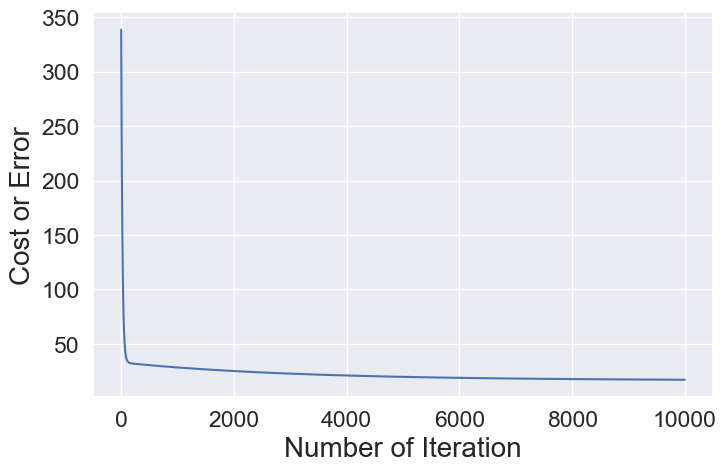

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(loss)),loss) 
plt.xlabel('Number of Iteration',fontsize=20)
plt.ylabel('Cost or Error',fontsize=20)
plt.show() 

In [16]:
def predict(x,m):
    predicted = np.c_[np.ones(len(x)),x]@m
    return predicted

In [17]:
y_predict = predict(test_x,m)

In [18]:
y_predict

array([[30.587813  ],
       [27.35200833],
       [19.68449209],
       [19.57629844],
       [ 9.95153814],
       [17.76348697],
       [13.01314902],
       [15.63758293],
       [14.51023328],
       [18.53649845],
       [20.91016673],
       [23.27368145],
       [15.84074077],
       [24.60757547],
       [22.28991762],
       [26.69305419],
       [26.24676177],
       [21.23831585],
       [19.0803534 ],
       [21.61830152],
       [23.10177707],
       [25.80515288],
       [26.07822487],
       [18.23264364],
       [19.08295463],
       [20.74371421],
       [ 8.97604474],
       [19.7778717 ],
       [19.65518657],
       [27.90075721],
       [18.155081  ],
       [25.21497474],
       [ 9.77154934],
       [15.25989327],
       [ 9.40663563],
       [23.37457039],
       [25.97058718],
       [15.68405714],
       [19.67766036],
       [26.51778078],
       [25.59727947],
       [22.53223675],
       [19.56207838],
       [20.60898805],
       [16.52746178],
       [19